TASK-1   	PMF, PDF, CDF Visualization




In [1]:
import pandas as pd
import os
import numpy as np
from math import sqrt
from scipy.stats import binom

In [2]:
from pylab import *
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
seed = 12345
np.random.seed(seed)

In [4]:
df = pd.read_csv("toy_dataset.csv")
df

,Number,City,Gender,Age,Income,Illness
0,1,Dallas,Male,41,40367.0,No
1,2,Dallas,Male,54,45084.0,No
2,3,Dallas,Male,42,52483.0,No
3,4,Dallas,Male,40,40941.0,No
4,5,Dallas,Male,46,50289.0,No
...,...,...,...,...,...,...
149995,149996,Austin,Male,48,93669.0,No
149996,149997,Austin,Male,25,96748.0,No
149997,149998,Austin,Male,26,111885.0,No
149998,149999,Austin,Male,25,111878.0,No


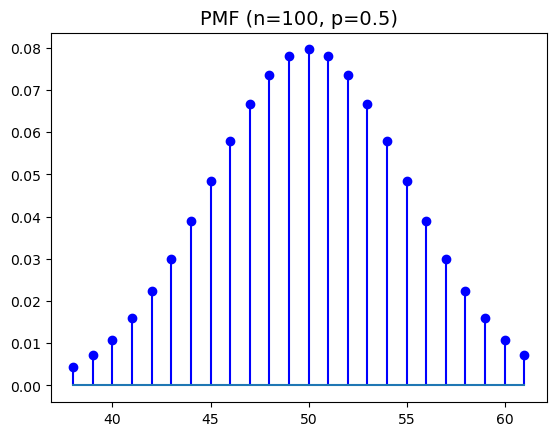

In [5]:
n = 100
p = 0.5
x = np.arange(binom.ppf(0.01, n, p), binom.ppf(0.99, n, p))
plt.stem(x, binom.pmf(x, n, p), linefmt='b-', markerfmt='bo', basefmt='')
plt.title('PMF (n=100, p=0.5)', fontsize=14)
plt.show()


TASK-2 	
Create and plot different Distributions

In [6]:
from scipy.stats import norm

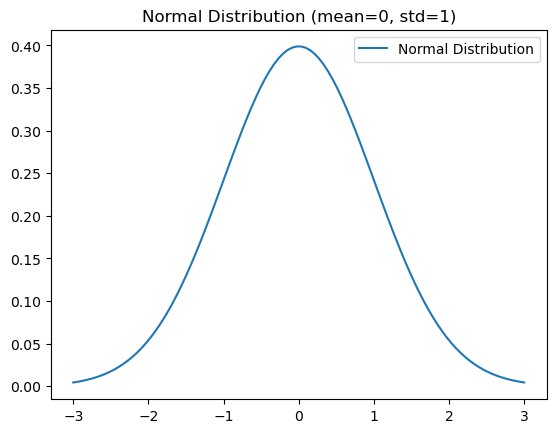

In [7]:
x = np.linspace(-3, 3, 100)
plt.plot(x, norm.pdf(x), label='Normal Distribution')
plt.title('Normal Distribution (mean=0, std=1)')
plt.legend()
plt.show()

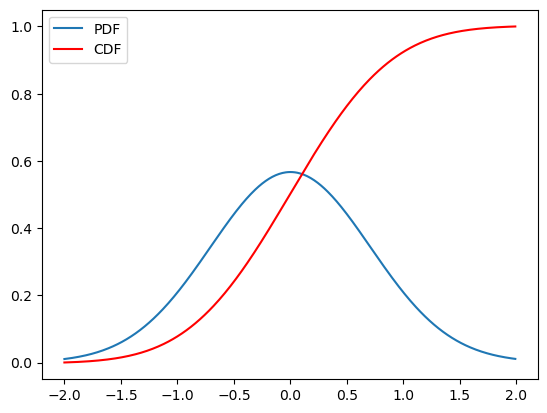

In [8]:
x = np.arange(-2, 2, 0.01)
y = np.exp(-x**2) / (0.01 * np.exp(-x**2).sum())
plt.plot(x, y, label='PDF')
plt.plot(x, np.cumsum(y * 0.01), 'r', label='CDF')
plt.legend()
plt.show()


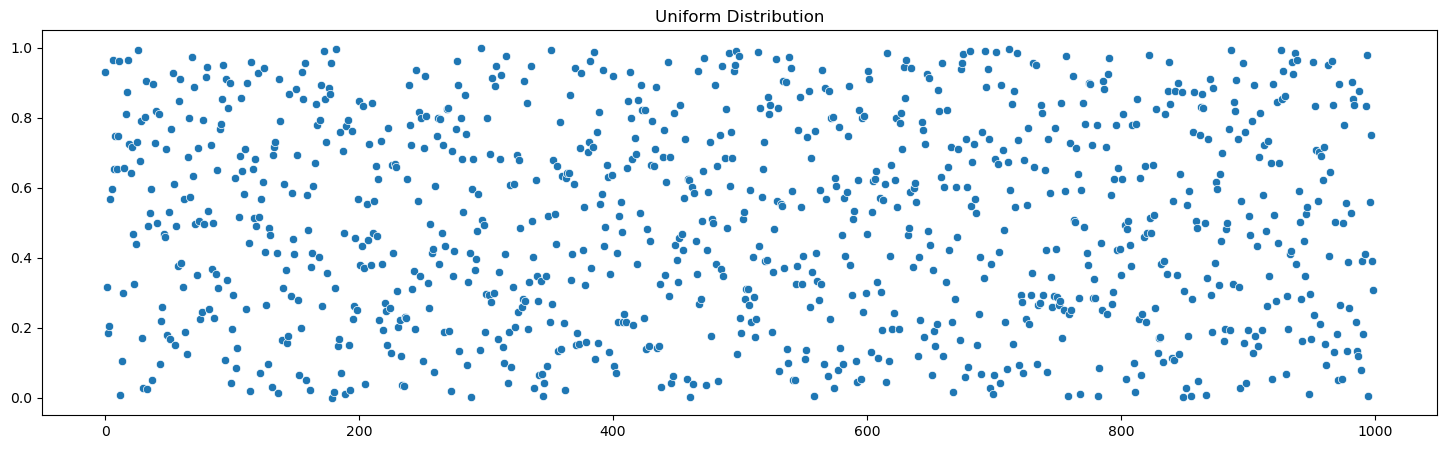

In [9]:
uniform_dist = np.random.random(1000)
plt.figure(figsize=(18,5))
sns.scatterplot(x=np.arange(1000), y=uniform_dist)
plt.title('Uniform Distribution')
plt.show()

Text(0.5, 1.0, 'Random/Uniform distribution')

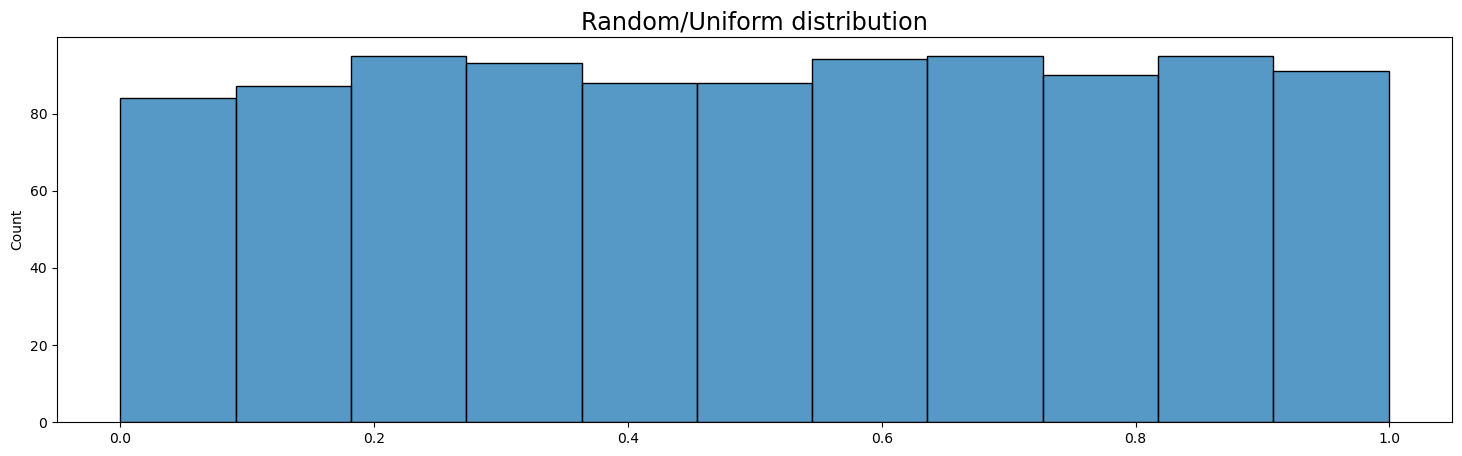

In [10]:
plt.figure(figsize=(18,5))
sns.histplot(uniform_dist)
plt.title('Random/Uniform distribution', fontsize='xx-large')

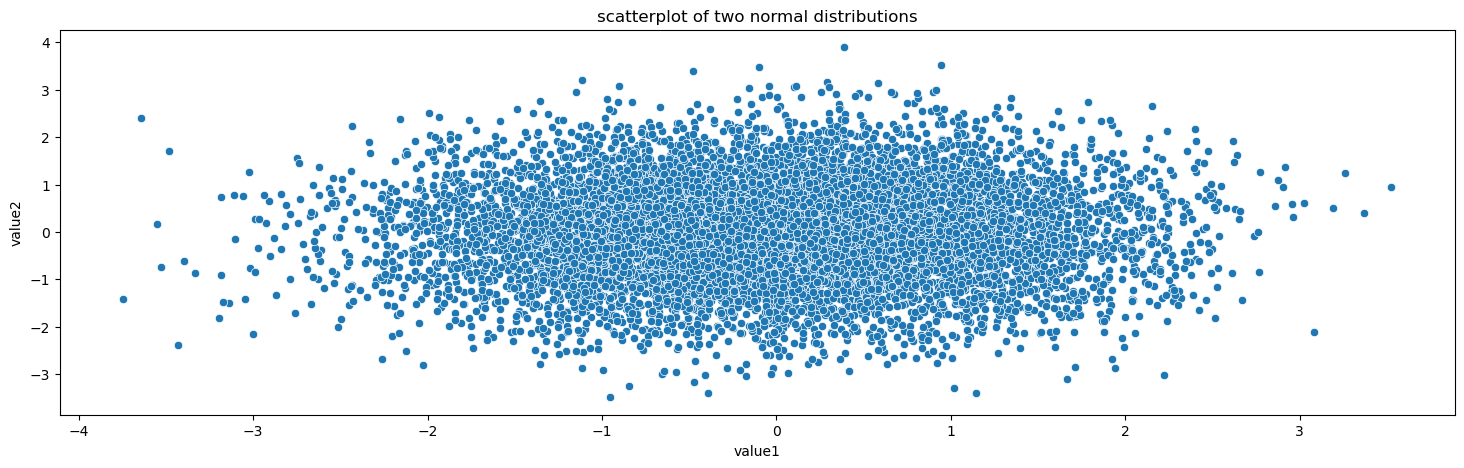

In [11]:
normal_df = pd.DataFrame({
    'value1' : np.random.randn(10000),
    'value2': np.random.randn(10000)})
plt.figure(figsize=(18, 5))
sns.scatterplot(x='value1', y='value2', data=normal_df)
plt.title('scatterplot of two normal distributions')
plt.show()

C:\Users\loges\AppData\Local\Temp\ipykernel_20384\3691376924.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(normal_df)


Text(0.5, 1.0, 'Normal distribution (n=1000)')

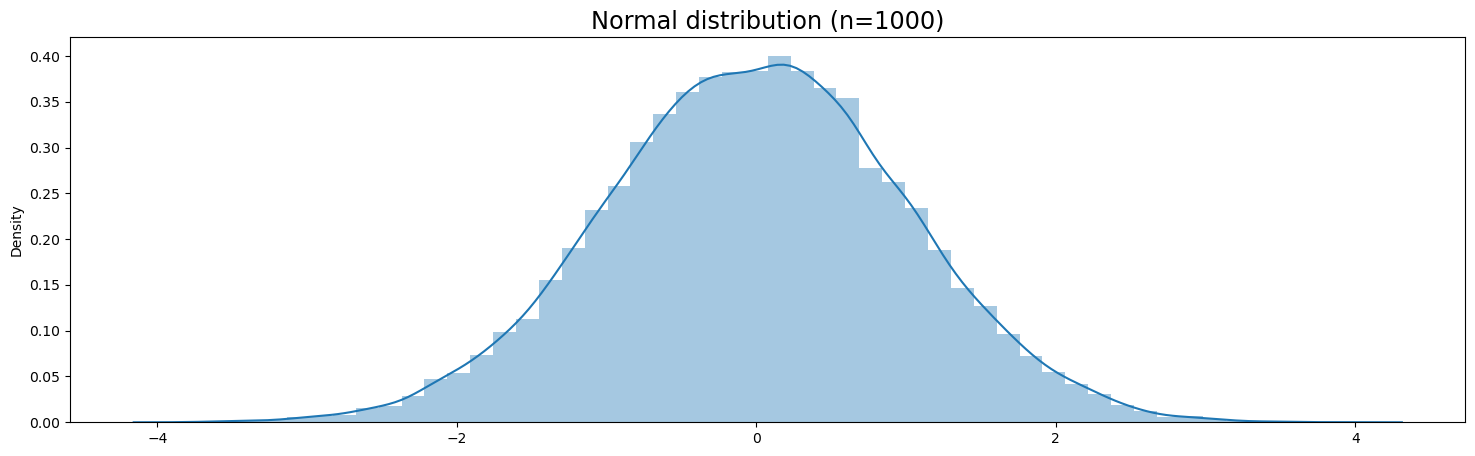

In [12]:
plt.figure(figsize=(18,5))
sns.distplot(normal_df)
plt.title('Normal distribution (n=1000)', fontsize='xx-large')

In [13]:
from scipy.stats import bernoulli

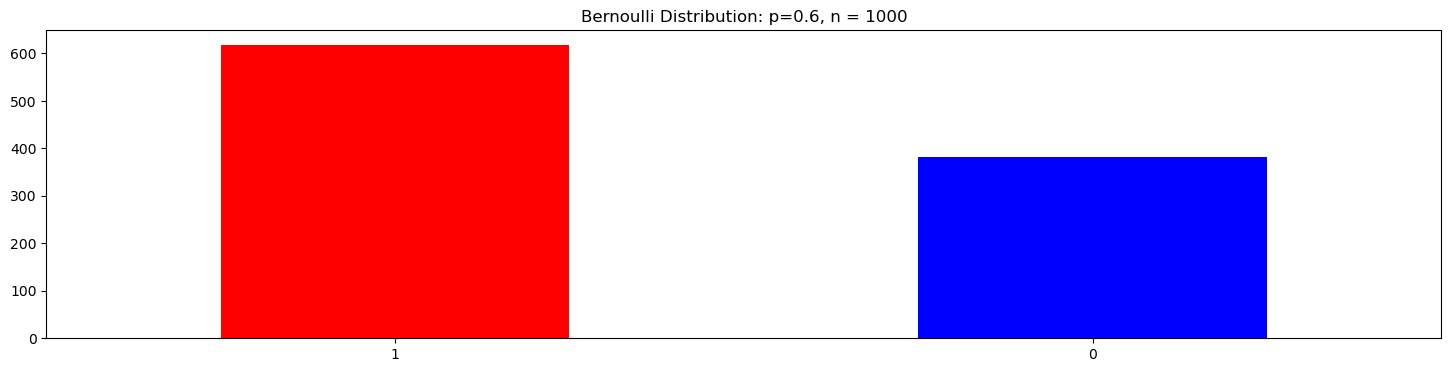

In [14]:
bern_values = pd.Series(bernoulli.rvs(p=0.6, size=1000)).value_counts()
plt.figure(figsize=(18, 4))
bern_values.plot(kind='bar', rot=0, color=['red','blue'])
for i,value in enumerate(bern_values):
    plt.annotate(f'n = {value}', xy=(i, value), fontsize='large', color='white')
plt.title('Bernoulli Distribution: p=0.6, n = 1000')
plt.show()

In [15]:
from scipy.stats import poisson

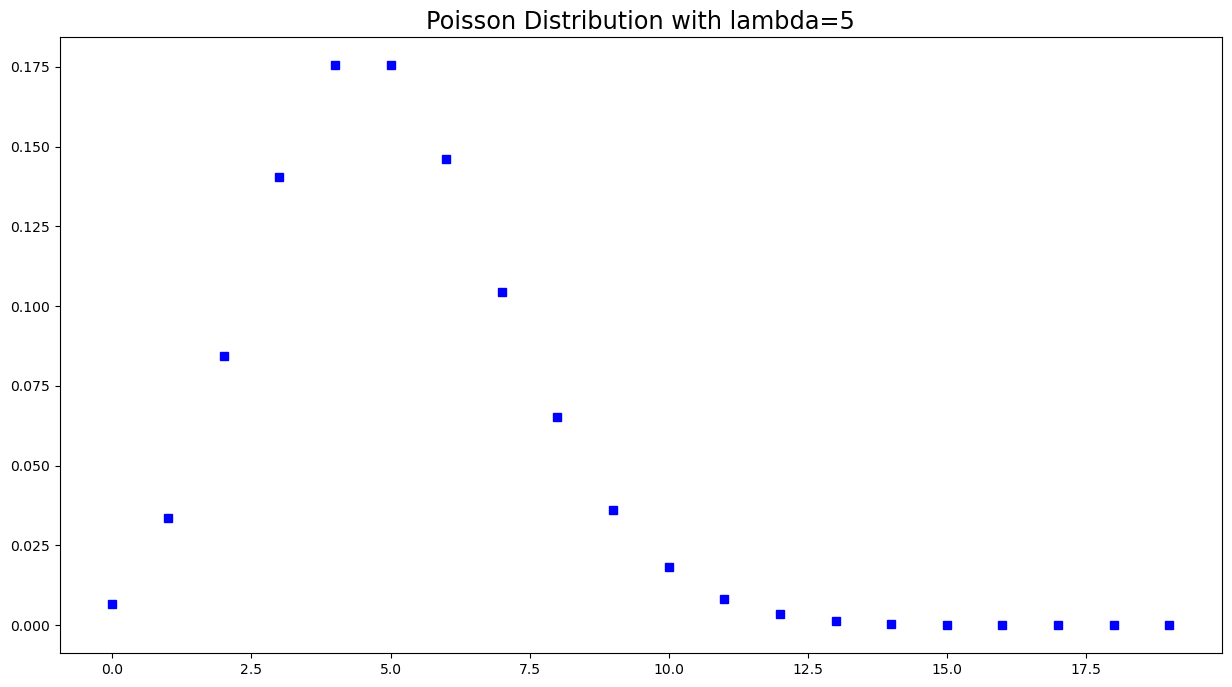

In [16]:
x = np.arange(0, 20)
y = poisson.pmf(x, mu=5)
plt.figure(figsize=(15, 8))
plt.title('Poisson Distribution with lambda=5', fontsize='xx-large')
plt.plot(x, y, 'bs')
plt.show()

In [17]:
from scipy.stats import lognorm

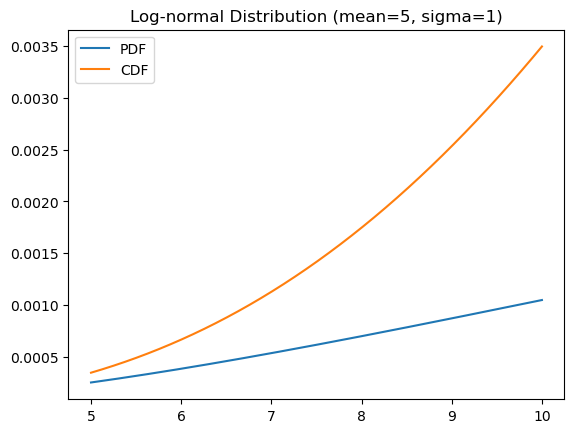

In [18]:
x = np.linspace(5, 10, 200)
dist = lognorm(s=1, scale=np.exp(5))
plt.plot(x, dist.pdf(x), label='PDF')
plt.plot(x, dist.cdf(x), label='CDF')
plt.title('Log-normal Distribution (mean=5, sigma=1)')
plt.legend()
plt.show()

TASK-3  Summary Statistics

In [19]:
print(normal_df.columns)

Index(['value1', 'value2'], dtype='object')


In [20]:


stats = normal_df['value1'].agg(['median','mean','var','std','skew','kurt'])
print(stats)

print(normal_df.describe())

median   -0.010146
mean     -0.012836
var       0.996109
std       0.998052
skew     -0.059723
kurt     -0.068318
Name: value1, dtype: float64
             value1        value2
count  10000.000000  10000.000000
mean      -0.012836      0.003300
std        0.998052      0.996509
min       -3.745356     -3.488399
25%       -0.699103     -0.660956
50%       -0.010146      0.013250
75%        0.669962      0.660029
max        3.525865      3.897527


TASK-4  	
Calculating Errors

In [21]:

bias = normal_df['value2'].sample(100).mean() - normal_df['value2'].mean()
print('Bias:', bias)


Bias: 0.0744154942958445


In [22]:
Y, YH = 100, 94


mse = (Y - YH) ** 2
rmse = np.sqrt(mse)

print('MSE:', mse)
print('RMSE:', rmse)

MSE: 36
RMSE: 6.0


In [24]:
uniform_dist = np.random.random(1000)  
normal_dist = np.random.randn(1000)    


print('SE (uniform):', sem(np.random.choice(uniform_dist.flatten(), 100)))
print('SE (normal):', sem(np.random.choice(normal_dist.flatten(), 100)))

NameError: name 'sem' is not defined

TASK-5  Sampling methods

In [26]:
import numpy as np
import pandas as pd
from random import sample
normal_dist = pd.Series(np.random.randn(1000))
print('Non-Representative Samples')
print('Convenience:', normal_dist.head(5).tolist())
print('Haphazard:', normal_dist.iloc[[12, 55, 582, 821, 999]].tolist())
print('Purposive:', normal_dist.nlargest(5).tolist())
print('\n---Representative Samples---')
print('Random:', normal_dist.sample(5).tolist())
print('Systematic:', normal_dist.iloc[::200].tolist())
df = pd.DataFrame({
    'City': np.random.choice(['A', 'B', 'C'], 1000),
    'Income': np.random.randint(20000, 80000, 1000)
})
strat_samples = df.groupby('City').apply(lambda x: x.sample(1))['Income'].tolist()
print('Stratified:', strat_samples)
clusters = [normal_dist.sample(10) for _ in range(5)]
cluster_samples = [c.sample(1).item() for c in clusters]
print('Cluster:', cluster_samples)

Non-Representative Samples
Convenience: [0.3693490016900547, 1.17960798748395, -1.0557736618638716, -2.197714183244104, -0.3402729727913143]
Haphazard: [-1.9341493942690917, -0.29765447582827786, 1.7024198881517887, -0.3680218567625732, -0.7446858248813572]
Purposive: [3.1230130598670756, 3.07620426053943, 2.6429410537222706, 2.5881844236781353, 2.532650648479459]

---Representative Samples---
Random: [0.7701289659178518, 1.521022066264091, -1.6486210382435795, -0.9987651703982707, 0.02624689778873855]
Systematic: [0.3693490016900547, 0.1620151797893525, -0.4130615115989351, 0.25051802128599165, 3.1230130598670756]
Stratified: [75048, 46915, 50256]
Cluster: [-1.0683217017892233, 0.09842988796959341, -1.9662893768261789, -0.5280344220426826, -1.0337063026071038]


C:\Users\loges\AppData\Local\Temp\ipykernel_20384\1743155674.py:33: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  strat_samples = df.groupby('City').apply(lambda x: x.sample(1))['Income'].tolist()


TASK-6 Relationships between 2 or more variables

In [43]:
df = pd.read_csv("toy_dataset.csv")
df.columns



Index(['Number', 'City', 'Gender', 'Age', 'Income', 'Illness'], dtype='object')

In [45]:
covariance_matrix = df[['Age', 'Income']].cov()
correlation_matrix = df[['Age', 'Income']].corr(method='pearson')

covariance_matrix, correlation_matrix

(               Age        Income
 Age     133.922426 -3.811863e+02
 Income -381.186341  6.244752e+08,
              Age    Income
 Age     1.000000 -0.001318
 Income -0.001318  1.000000)

TASK-7 	
Bootstrapping

In [38]:
bootstrap_means = []
for _ in range(n_iterations):
    sample = df['Income'].sample(n=sample_size, replace=True)
    bootstrap_means.append(sample.mean())
    boot_mean = np.mean(bootstrap_means)
ci_lower, ci_upper = np.percentile(bootstrap_means, [2.5, 97.5])



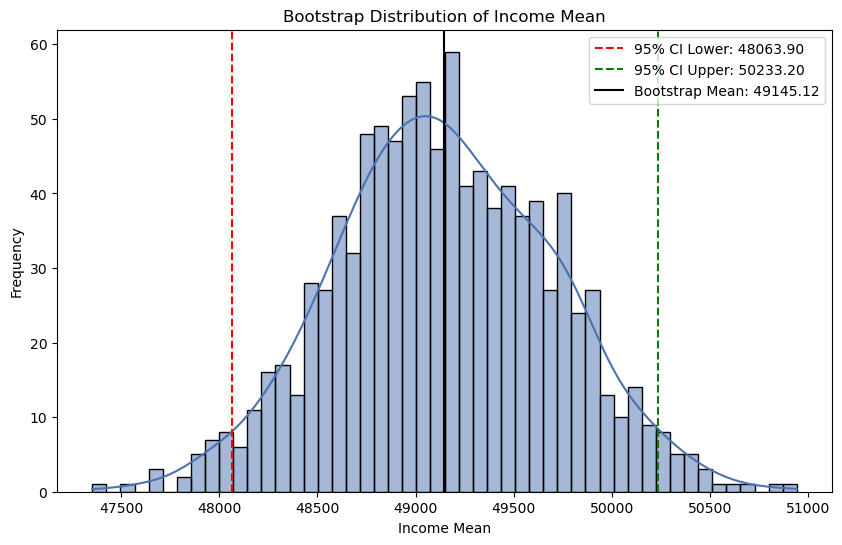

(49145.11672400001, 48063.9048, 50233.19775)

In [40]:
plt.figure(figsize=(10, 6))
sns.histplot(bootstrap_means, bins=50, kde=True, color='#4C72B0')
plt.axvline(ci_lower, color='red', linestyle='--', label=f'95% CI Lower: {ci_lower:.2f}')
plt.axvline(ci_upper, color='green', linestyle='--', label=f'95% CI Upper: {ci_upper:.2f}')
plt.axvline(boot_mean, color='black', linestyle='-', label=f'Bootstrap Mean: {boot_mean:.2f}')
plt.title('Bootstrap Distribution of Income Mean')
plt.xlabel('Income Mean')
plt.ylabel('Frequency')
plt.legend()
plt.show()

boot_mean, ci_lower, ci_upper